# Statistical analysis of a fracture network

This notebook will show how to perform statistical analysis of the analyized network by:
+ Fit different distributions to the dataset
+ Plot summary plots for each fitted distribution
+ Visually compare different fits using PIT
+ Show and export statistical summary tables

In [1]:
from fracability.examples import data  # import the path of the sample data
from fracability import Entities, Statistics  # import the Entities class

import scipy.stats as ss
import matplotlib.pyplot as plt

## Import the Pontrelli quarry Set a and calculate the topology

In [2]:
pontrelli_data = data.Pontrelli()
data_dict = pontrelli_data.data_dict  # Get dict of paths for the data

# Create the fractures and boundary objects. 
set_a = Entities.Fractures(shp=data_dict['Set_a.shp'], set_n=1)  # to add your data put the absolute path of the shp file

boundary = Entities.Boundary(shp=data_dict['Interpretation_boundary.shp'], group_n=1)

fracture_net = Entities.FractureNetwork()

fracture_net.add_fractures(set_a)
fracture_net.add_boundaries(boundary)

fracture_net.calculate_topology()




Calculating intersections on fracture: 1945/1945


Analyzing nodes:20983/20983

Done!


## NetworkFitter 

The network fitter class is responsible of running the statistical analysis on the fracture network. There are different options:
1. use_survival: Boolean flag to use survival (True) or treat the data as if there were no censoring (False). Default is True. 
2. complete_only: Boolean flag to use only complete measurements (True) or all the dataset (False). This flag is used only when use_survival is False. Default is False.
3. use_AIC: Boolean flag to use AIC (true) or AICc (false) for model selection. Default is True


These options are useful to compare different ways of fitting the data with survival analysis however we strongly suggest to always use survival analysis since in case of no censoring the final results will be the same as the other methods.

In [3]:
fitter = Statistics.NetworkFitter(fracture_net)

### Fit different distributions

All the rv_continous distribution present in scipy are valid (https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions).

Each time a fit is run the Akaike, Kolmogorov-Smirnov, Koziol and Green and Anderson Darling distances are calculated and saved.

In [4]:
fitter.fit('lognorm')
fitter.fit('expon')
fitter.fit('norm')
fitter.fit('gengamma')
fitter.fit('powerlaw')
fitter.fit('weibull_min')

### Show the model rank table

In [5]:
fitter.fit_records(sort_by='Akaike').iloc[:,:-1] # the iloc is to remove the last column that is not useful in this case

,name,Akaike,delta_i,w_i,max_log_likelihood,KS_distance,KG_distance,AD_distance,Akaike_rank,KS_rank,KG_rank,AD_rank,Mean_rank
0,lognorm,8522.146941,0.0,1.0,-4259.07347,0.016002,0.0725,0.555213,1,1,1,1,1.00
1,gengamma,8553.929004,31.782064,0.0,-4273.964502,0.025574,0.308535,2.625846,2,2,2,2,2.00
2,weibull_min,8770.365928,248.218987,0.0,-4383.182964,0.057863,2.534635,19.182946,3,3,4,3,3.25
3,expon,8774.850744,252.703803,0.0,-4386.425372,0.06293,2.327379,19.528338,4,4,3,4,3.75
4,powerlaw,10639.543222,2117.396281,0.0,-5317.771611,0.322579,71.711907,354.199262,5,6,6,6,5.75
5,norm,10682.113997,2159.967056,0.0,-5339.056998,0.182519,24.537955,148.010925,6,5,5,5,5.25


### Plot the different models using PITsummary plots

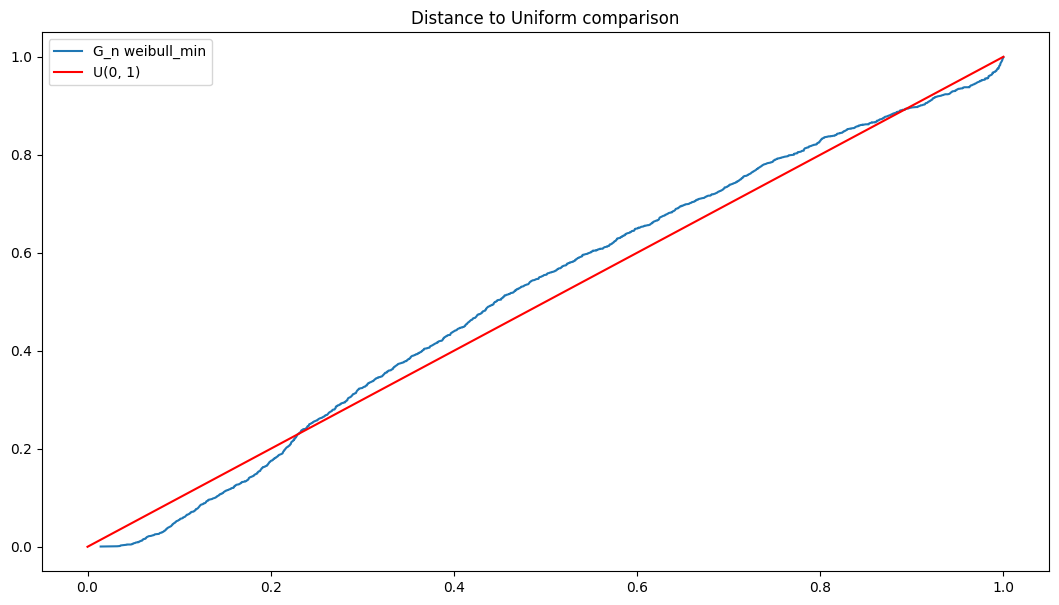

In [6]:
# Plot specific model
fitter.plot_PIT(fitter,position=[3],sort_by='Akaike')

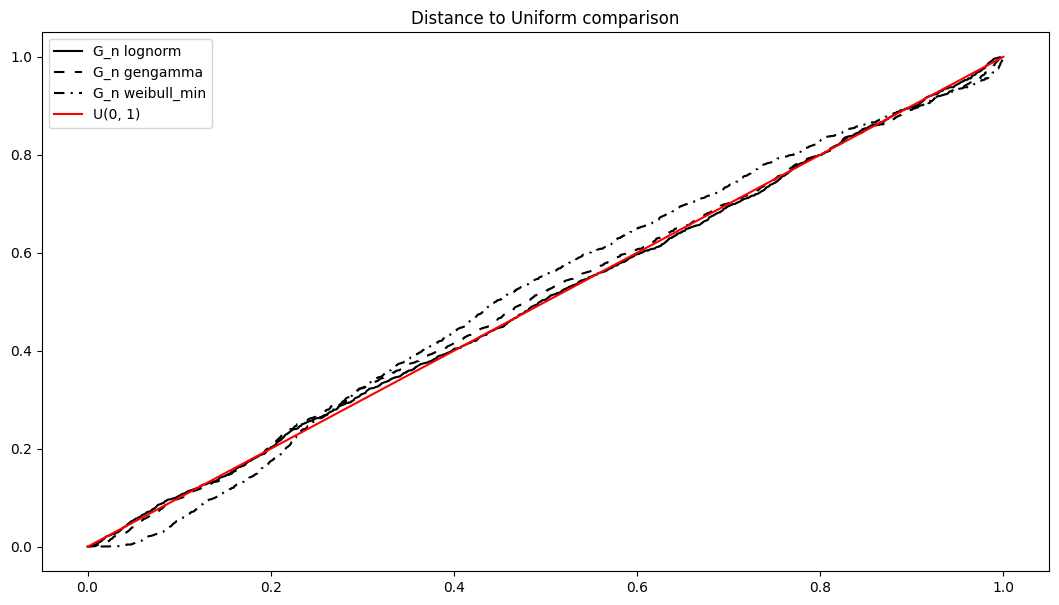

In [8]:
# Plot specific models together
fitter.plot_PIT(fitter,position=[1,2,3],sort_by='Akaike', bw=True)  # bw flag to make the plot color-blind friendly

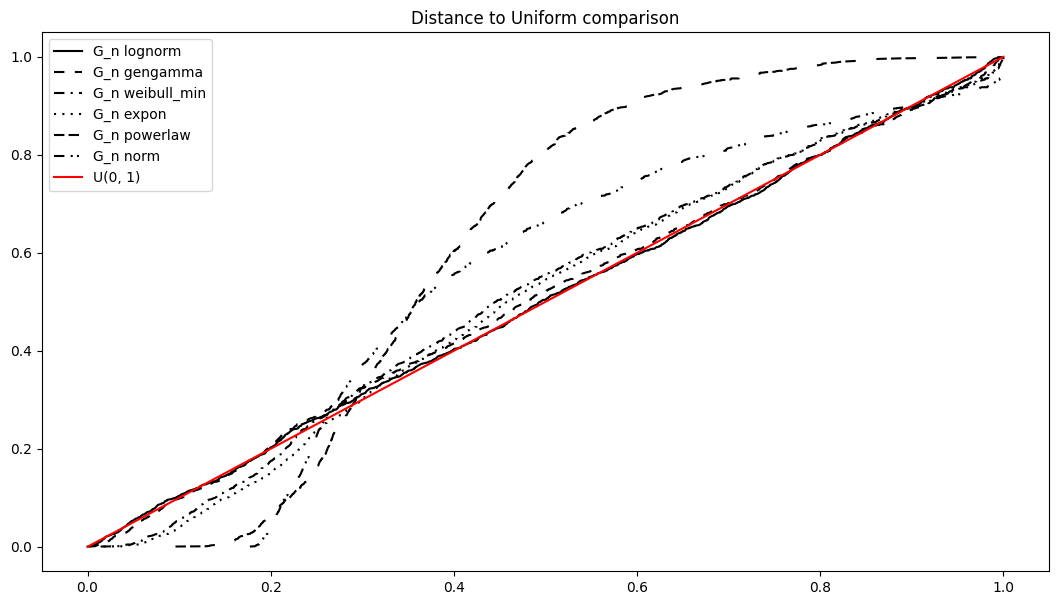

In [9]:
# Plot all the models
fitter.plot_PIT(sort_by='Akaike', bw=True) 

### Plot summary plots

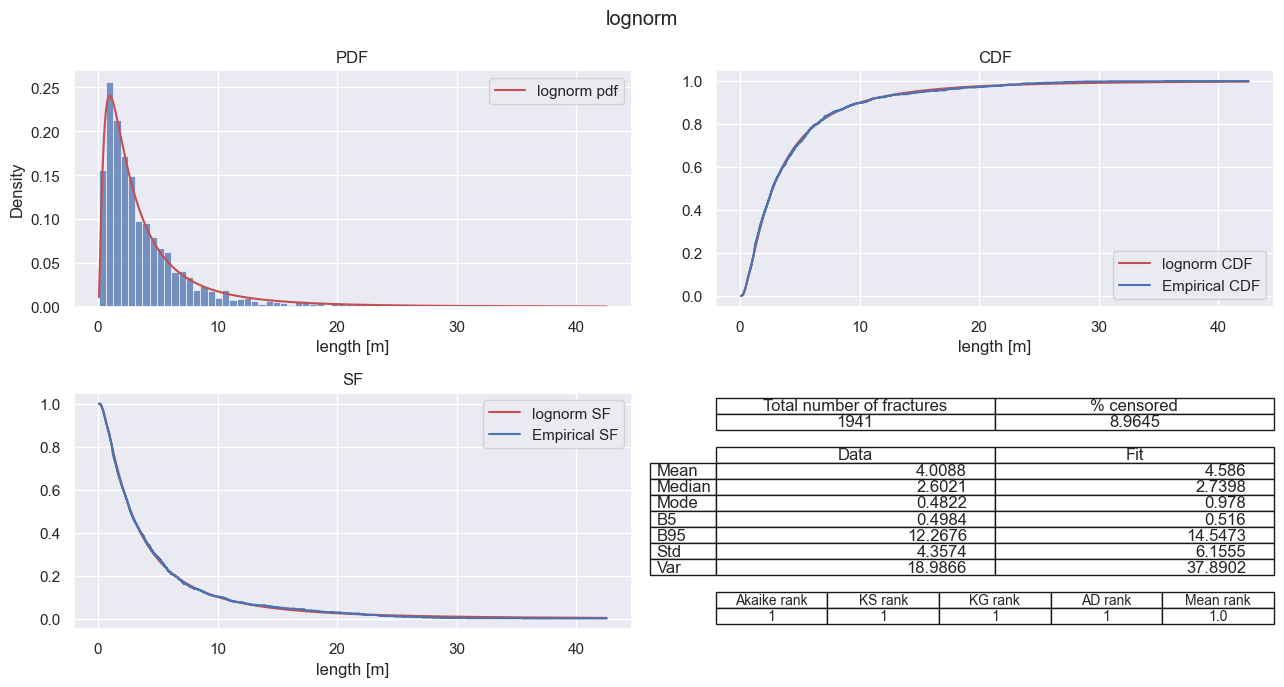

In [10]:
# Plot specific model
fitter.plot_summary(position=[1], sort_by='Mean_rank')

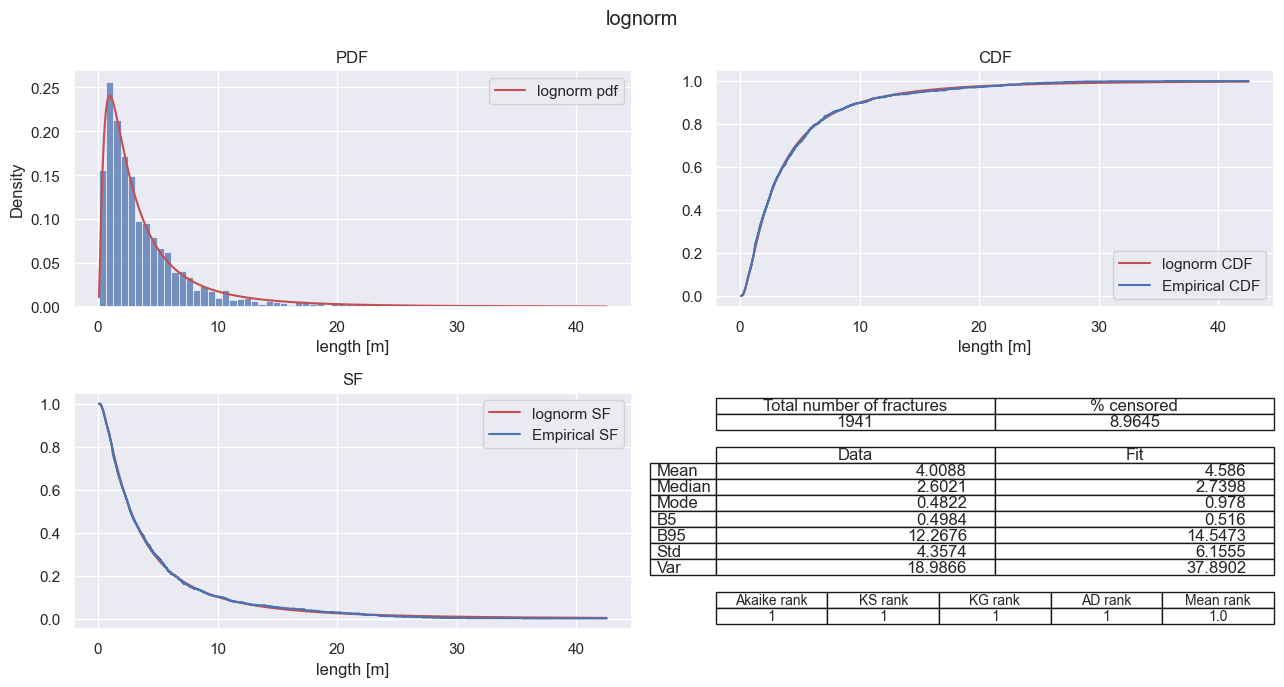

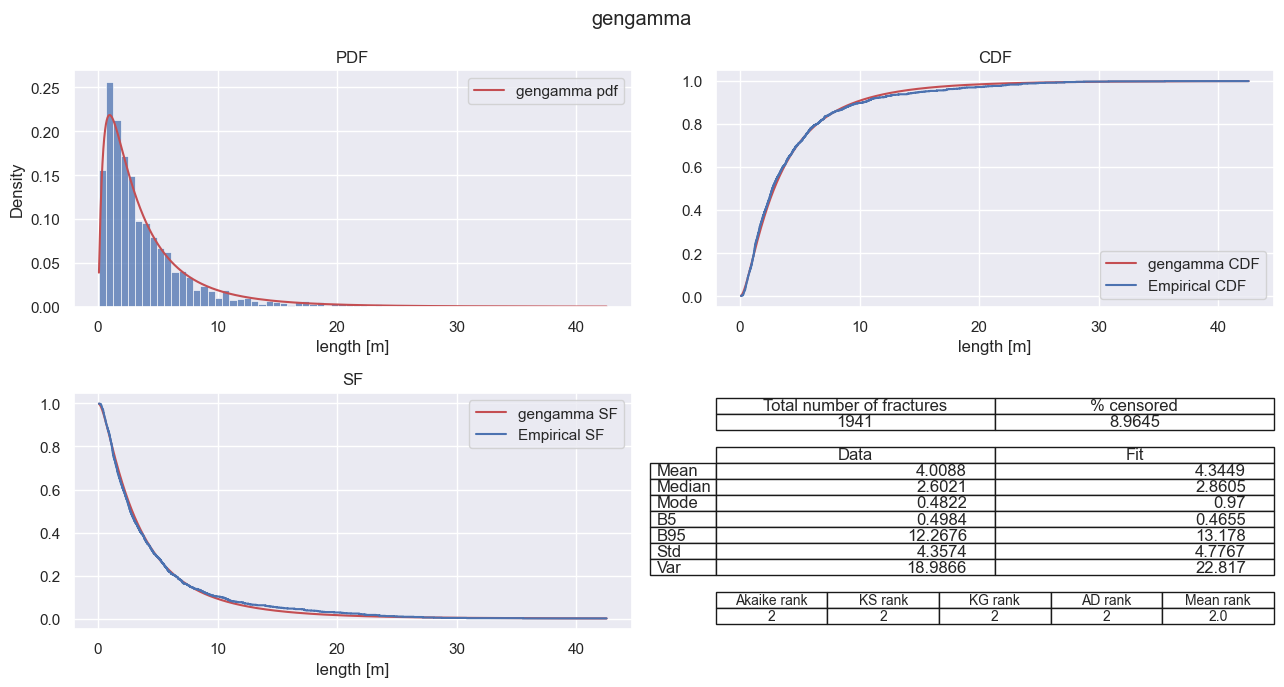

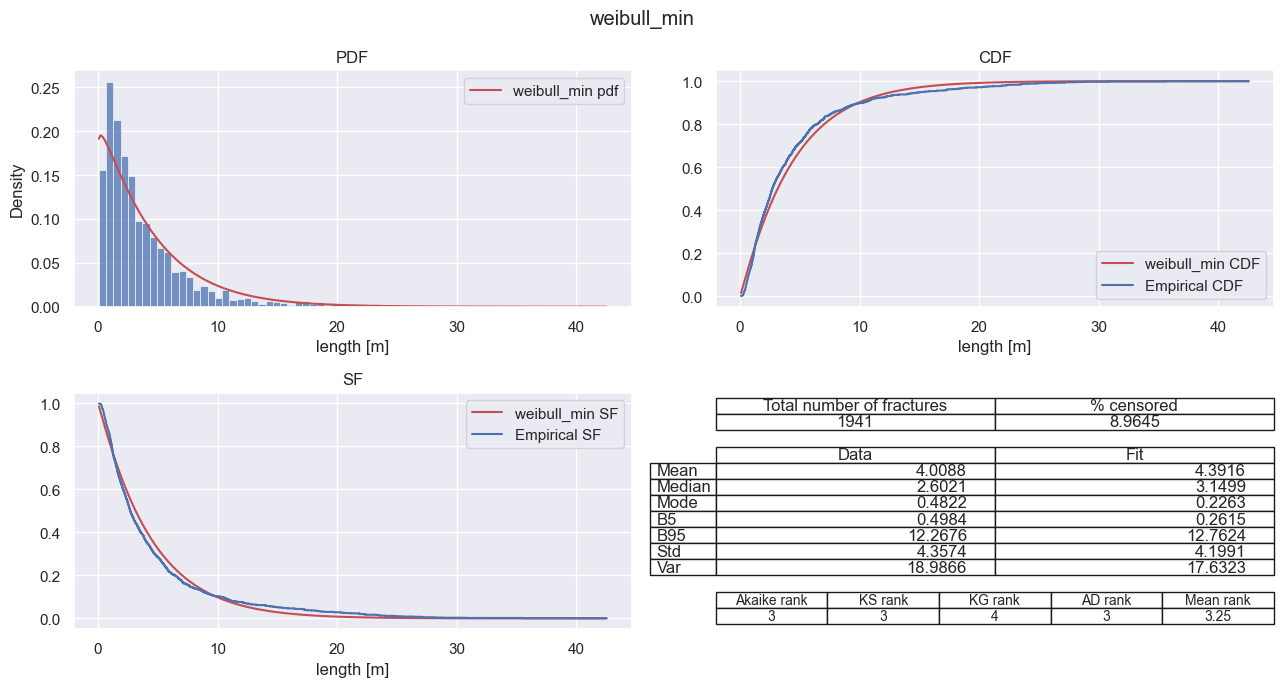

In [11]:
# Plot specific models (separate plots)
fitter.plot_summary(position=[1,2,3], sort_by='Mean_rank')

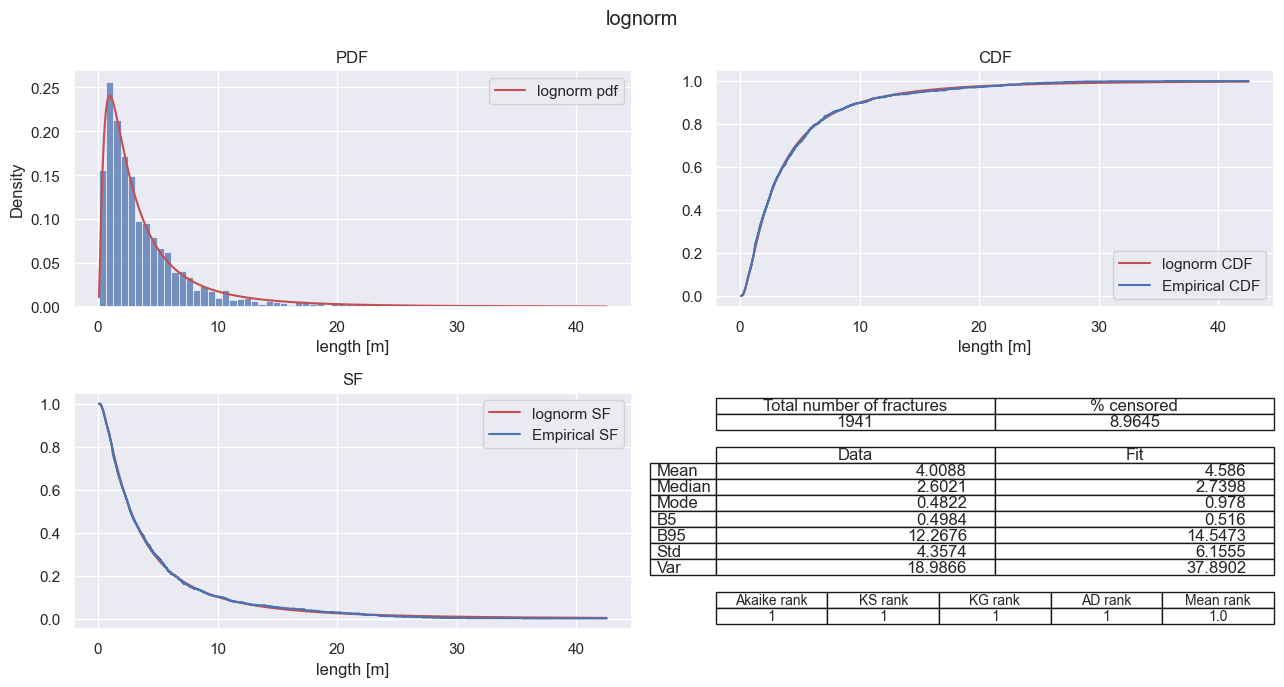

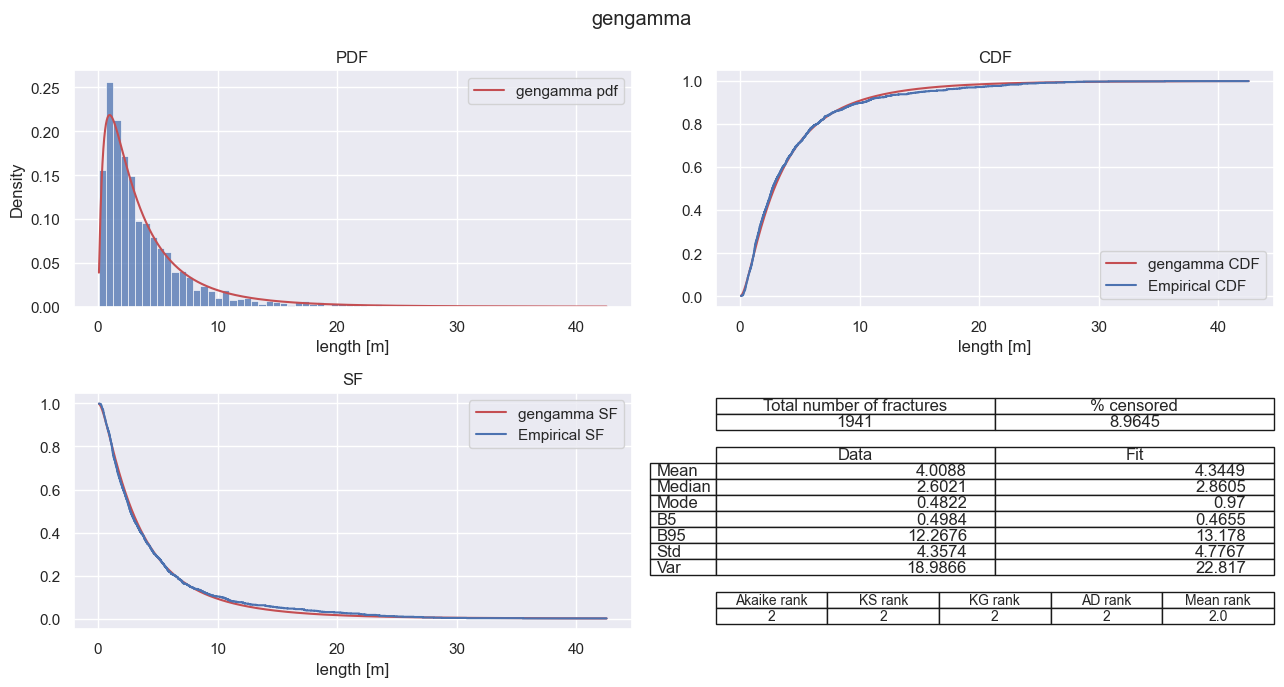

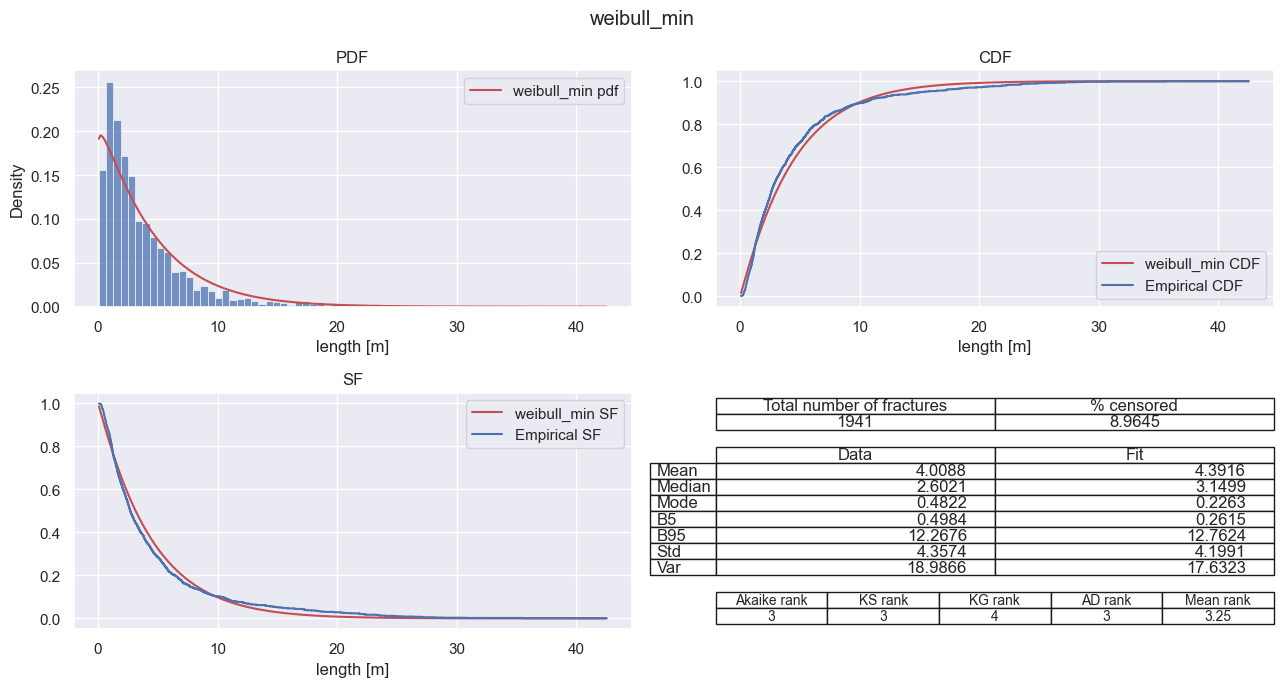

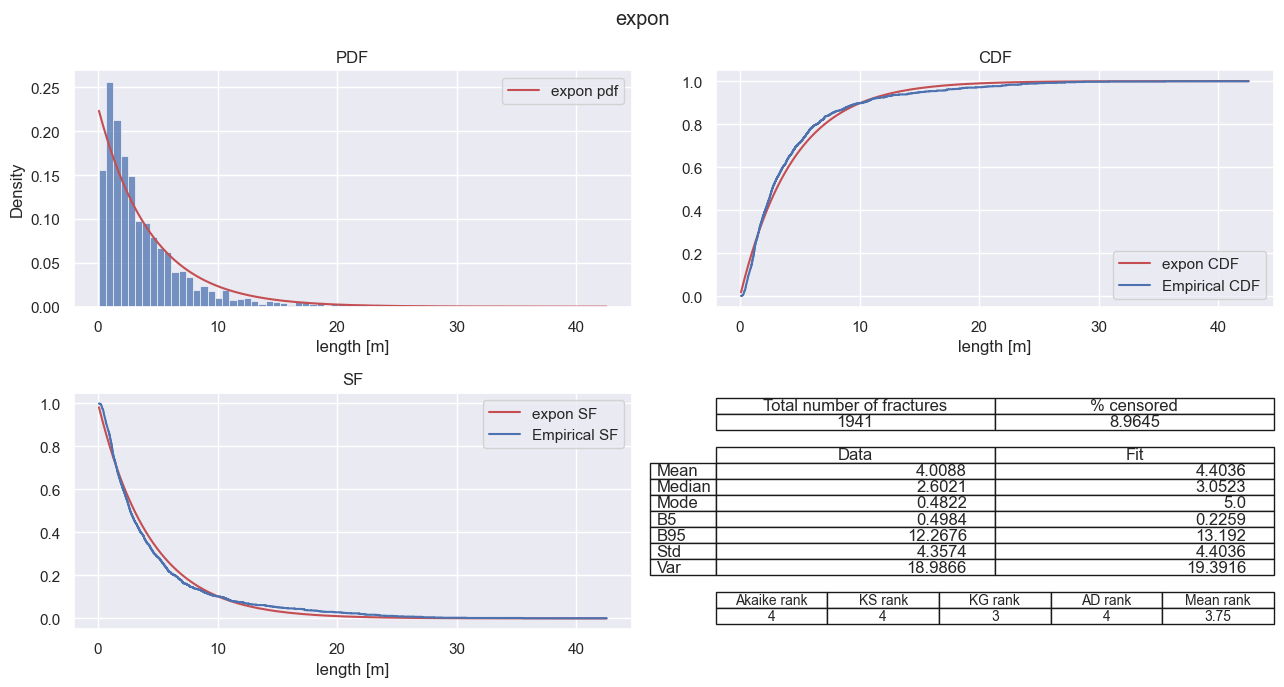

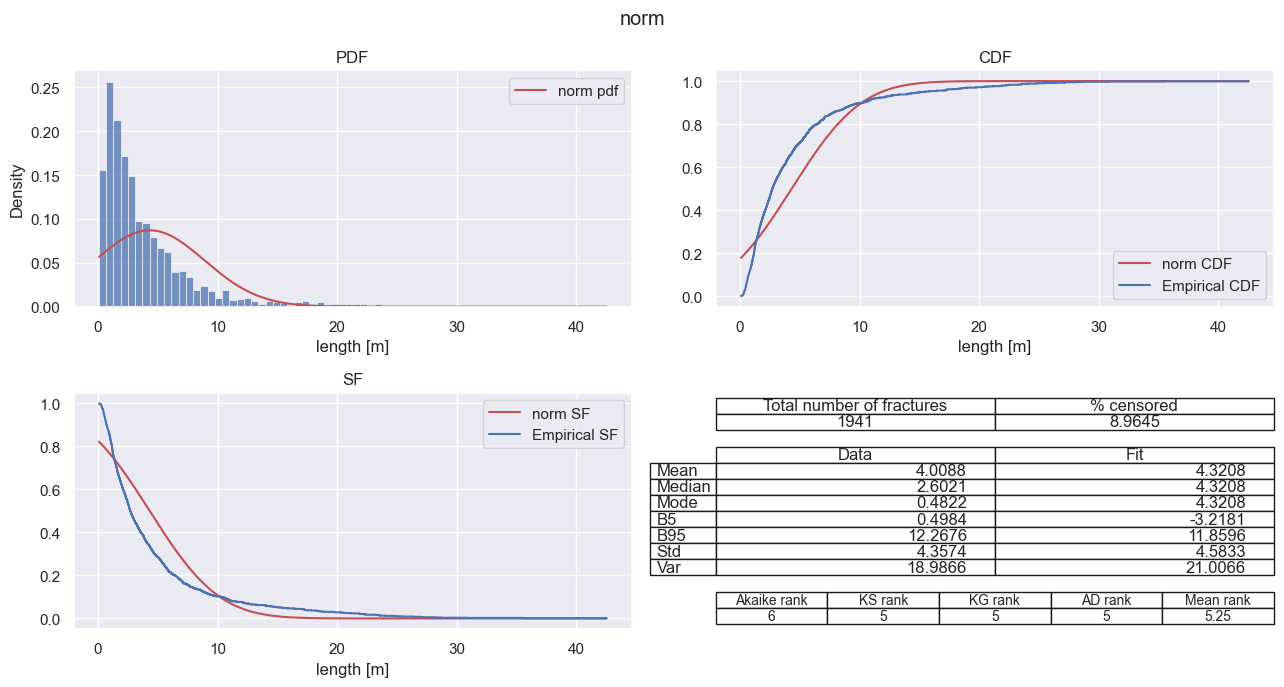

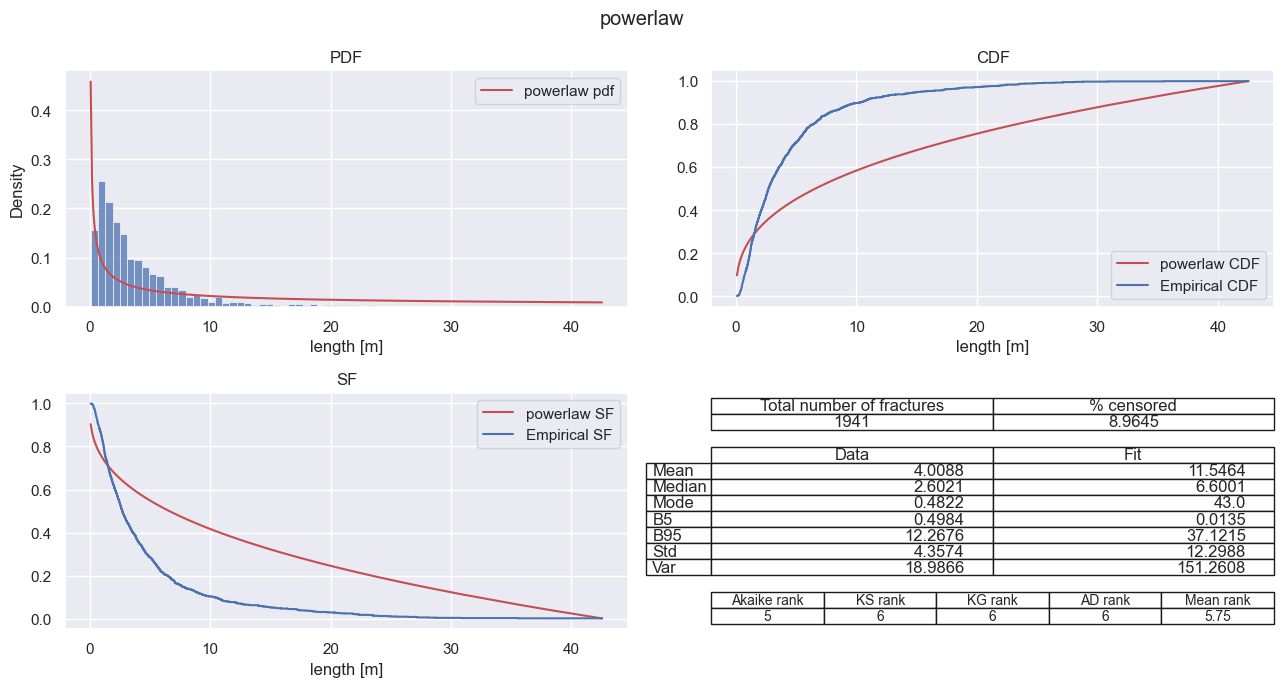

In [12]:
# Plot all the models (separate plots)
fitter.plot_summary(sort_by='Mean_rank')

### Export the fit_records table

The fit_records table can also be saved as csv, excel or directly to clipboard in a excel friendly format 

In [ ]:
fitter.fit_result_to_csv('test_export.csv')
fitter.fit_result_to_excel('test_export.xlsx')
fitter.fit_result_to_clipboard()